# Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino,identificacoes_treino),(imagens_teste,identificacoes_teste)) = dataset.load_data()

# Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_treino)
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

# Exibição dos dados

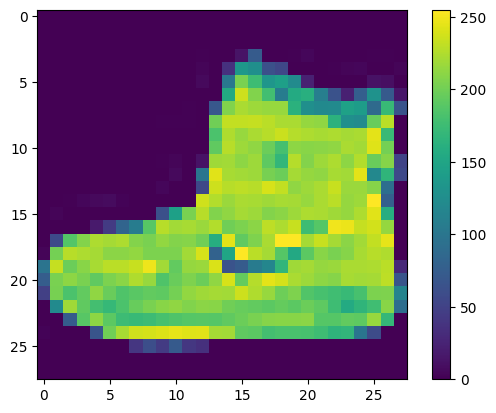

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

# Normalizando as imagens

In [5]:
imagens_treino = imagens_treino / float(255)

# Criando, compilando, treinando e normalizando o modelo

In [19]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(total_de_classificacoes, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(learning_rate=0.002)

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', monitor='val_loss', save_best_only=True)]

modelo.compile(
    optimizer= adam,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size=480, epochs=5, validation_split=0.2, callbacks=parando_cedo)

Epoch 1/5
100/100 [==============================] - 1s 10ms/step - loss: 0.6918 - accuracy: 0.7551 - val_loss: 0.4583 - val_accuracy: 0.8375
Epoch 2/5
100/100 [==============================] - 1s 8ms/step - loss: 0.4630 - accuracy: 0.8369 - val_loss: 0.4169 - val_accuracy: 0.8485


# Sumário do modelo

In [7]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Pesos da primeira camada dense

In [8]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

# Vieses da primeira camada dense

In [9]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

In [10]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()


In [11]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

# Salvando e carregando o modelo

In [12]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

# Visualizando as acurácias de treino e validação por época

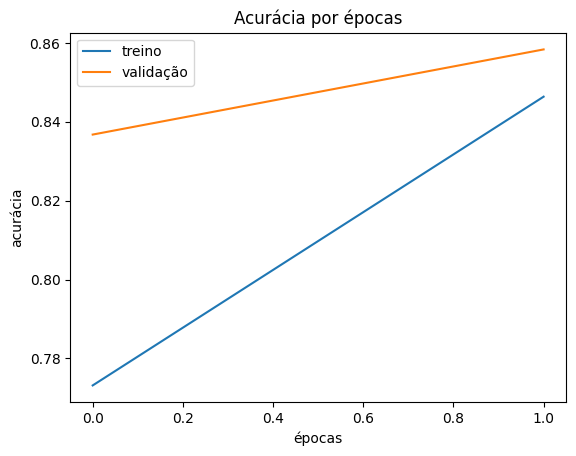

In [13]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

# Visualizando as perdas de treino e validação por época

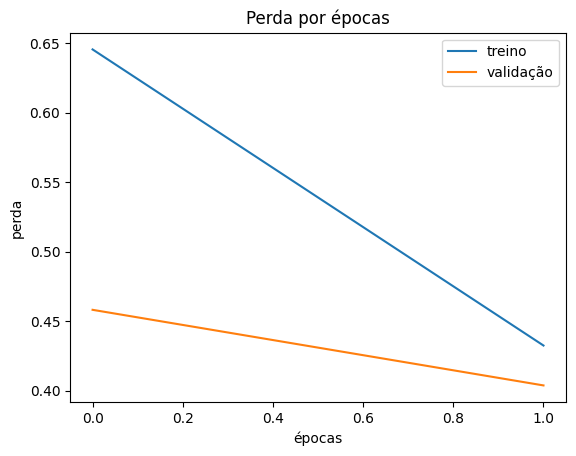

In [14]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [15]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

# Testando o modelo e o modelo salvo

In [16]:
testes = modelo.predict(imagens_teste)
print('resultado teste: ',np.argmax(testes[1]))
print('número da imagem de teste: ', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste: ',np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste: ', identificacoes_teste[1])

313/313 [==============================] - 1s 1ms/step
resultado teste:  2
número da imagem de teste:  2
313/313 [==============================] - 0s 1ms/step
resultado teste:  2
número da imagem de teste:  2


# Avaliando o modelo

In [17]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acuracia do teste: ', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 54.7414 - accuracy: 0.8404
Perda do teste:  54.74138259887695
Acuracia do teste:  0.840399980545044
